In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load the dataset
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
#drop un neccessary column

df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True) 

In [4]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
#check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

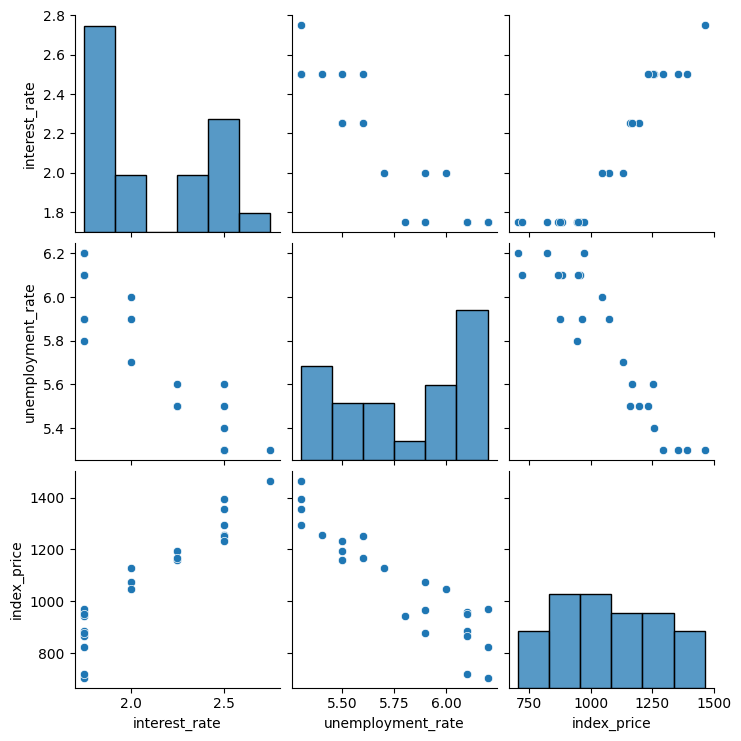

In [6]:
#plotting the graph
sns.pairplot(df);

In [7]:
df.corr()
#int_rate is negatively corr with unemployment_rate
#similar for index_price with unemployment_rate

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


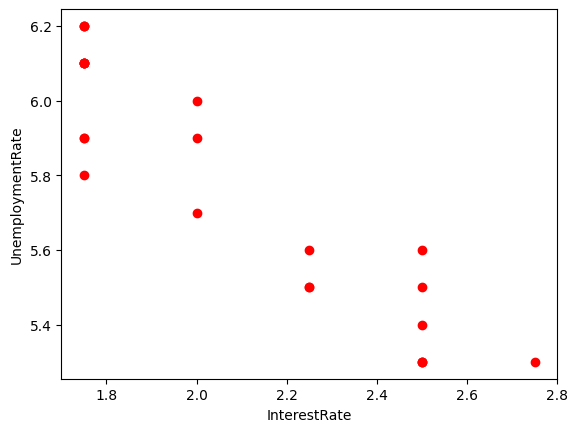

In [8]:
#visualize the data points more closely

plt.scatter(df['interest_rate'] , df['unemployment_rate'],color='r')
plt.xlabel('InterestRate')
plt.ylabel('UnemploymentRate');

In [9]:
#independent and dependent features
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [10]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [11]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [12]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

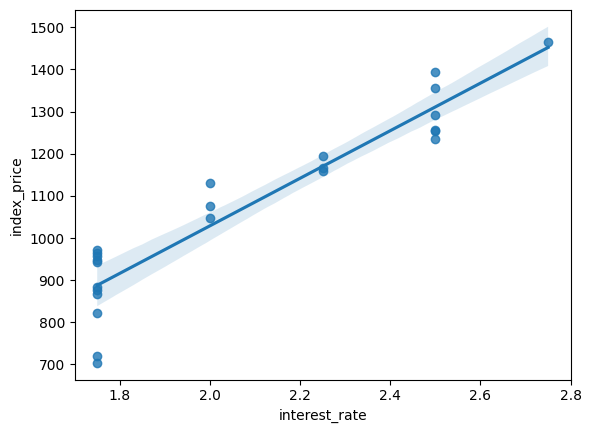

In [13]:
sns.regplot(data=df , x='interest_rate' , y='index_price');

### index_rate are highly correlated with index_price

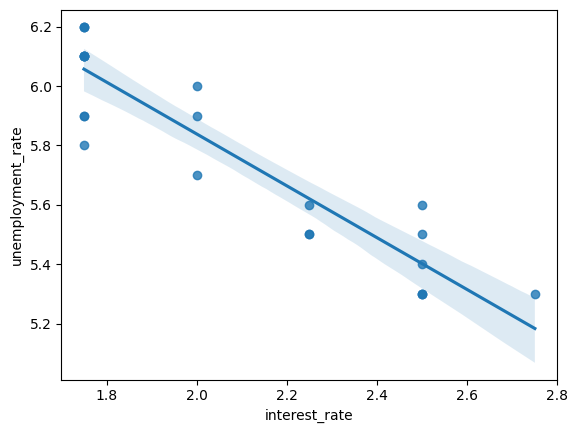

In [14]:
sns.regplot(data=df , x='interest_rate' , y='unemployment_rate');

### index_rate are negatively correlated with unemployment_rate

In [15]:
#scalling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_test

array([[-1.03209369,  0.49939076],
       [-1.03209369,  1.0924173 ],
       [-1.03209369,  1.0924173 ],
       [-0.3317444 ,  0.79590403],
       [ 0.36860489, -0.39014903]])

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)

In [18]:
#cross_validation

from sklearn.model_selection import cross_val_score
cv = cross_val_score(estimator=lr , X=X_train,y=y_train,scoring='neg_mean_squared_error',cv=3)

In [19]:
np.mean(cv)

-6251.092549819809

In [20]:
np.sqrt(9124.653822946224)

95.52305388201438

In [21]:
#prediction
y_pred = lr.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MSE : ",mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))



MSE :  3345.6935299011298
MAE :  45.681855707106955
R2 :  0.7374476942640384


In [30]:
#adjusted r2
print(1- (1-r2_score(y_test,y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.4748953885280769


## Assumptions

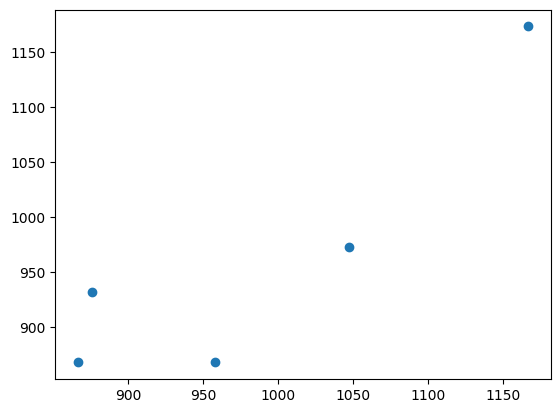

In [24]:
plt.scatter(y_test,y_pred);

In [25]:
residuals = y_test - y_pred
print("Error : \n",residuals)

Error : 
 20   -55.993898
19    -2.206030
15    89.793970
12    74.060391
9     -6.354989
Name: index_price, dtype: float64


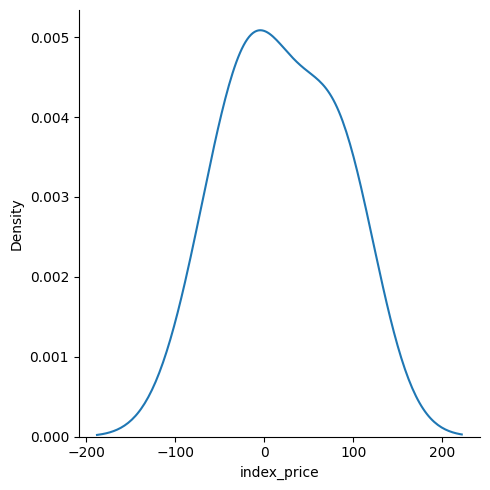

In [26]:
#plot the error
sns.displot(residuals,kind='kde');

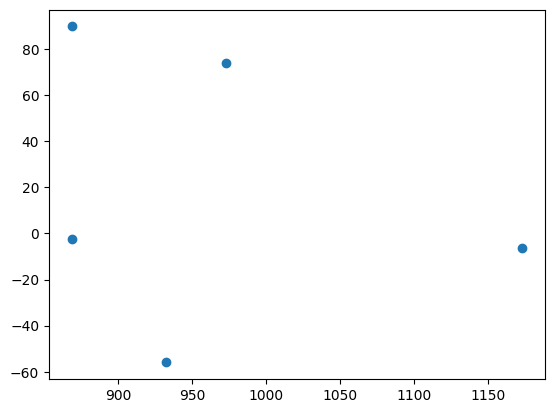

In [27]:
#scatter plot with respect to prediction and errors
plt.scatter(y_pred,residuals);

In [28]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.079
Method:                 Least Squares   F-statistic:                             0.3057
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                       0.741
Time:                        09:54:04   Log-Likelihood:                         -159.94
No. Observations:                  19   AIC:                                      323.9
Df Residuals:                      17   BIC:                                      325.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

g:\GeekDS\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


In [29]:
print(lr.coef_)

[ 104.00473808 -107.56326146]
